<a href="https://colab.research.google.com/github/EddyGiusepe/Overfitting_and_Regularization/blob/main/Regularization_for_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Overfitting e Regularização</h2>


Data Scientist: Dr.Eddy Giusepe Chirinos Isidro

# Regularization

Como temos percebido, quando treinamos Redes Neurais corremos o risco de fazer `OVERFITTING` aos Dados de Treinamento, o qual será traduzido é uma má performance de nosso modelo quando receba Dados que nunca haja visto (ou seja não haverá GENERALIZADO). A melhor maneira de saber se nosso modelo tem Overfitting é observando as Curvas de Treinamento (<font color="orange">ver o gráfico a seguir</font>).

Neste script vamos treinar uma `MLP` no Dataset [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) para classificação de imagens em $10$ classes diferentes.

![](https://hidden.brutalk.com/wp-content/uploads/2021/02/1614208808_358_How-to-use-Learning-Curves-to-Diagnose-Machine-Learning-Model.png)

Usaremos a biblioteca `torchvision` para descarregar o Dataset. 

Este Dataset está formado por imagens em cor de baixa resolução, temos $50000$ imagens de Treinamento e $10000$ de teste. O objetivo é classificar em $10$ classes diferentes. Vejamos alguns exemplos:

In [1]:
import torchvision

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

len(trainset), len(testset)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


(50000, 10000)

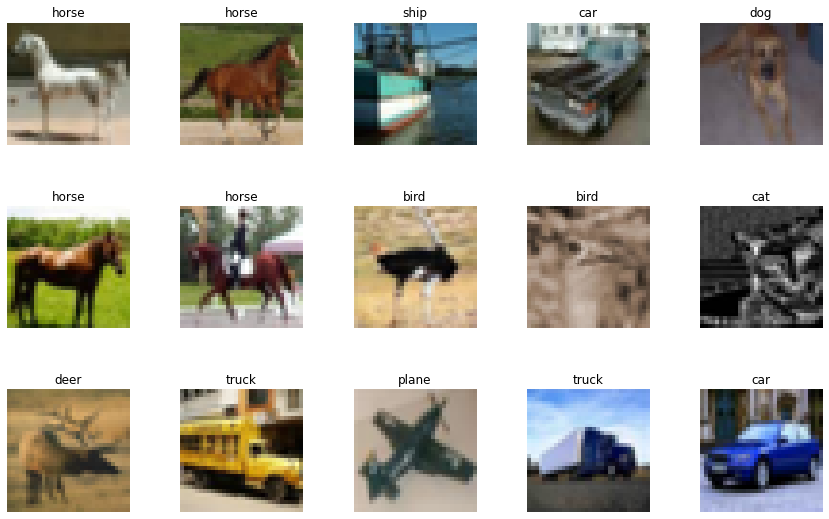

In [3]:
import random 
import matplotlib.pyplot as plt
%matplotlib inline

r, c = 3, 5
plt.figure(figsize=(c*3, r*3))
for row in range(r):
    for col in range(c):
        index = c*row + col
        plt.subplot(r, c, index + 1)
        ix = random.randint(0, len(trainset)-1)
        img, label = trainset[ix]
        plt.imshow(img)
        plt.axis('off')
        plt.title(classes[label])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

A seguir vamos a transformar as imagens em `arrays` de `NumPy` para poder trabalhar com elas mais facilmente.

In [4]:
import numpy as np


train_images = np.array([np.array(img) for img, label in trainset])
X_test = np.array([np.array(img) for img, label in testset])

train_labels = np.array([label for img, label in trainset])
y_test = np.array([label for img, label in testset])

X_train, X_val, X_subset = train_images[:40000], train_images[40000:], train_images[:5000]
y_train, y_val, y_subset = train_labels[:40000], train_labels[40000:], train_labels[:5000]


X_train.shape, X_val.shape, X_test.shape, X_subset.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3), (5000, 32, 32, 3))